# Ex 1:
A method for detecting a disease fails to detect it in 15% of patients that actually have it. A random sample of n = 75 patients known to have the disease is screened through the new method

a) write the probability mass function of getting a false negative y using the new tecnique


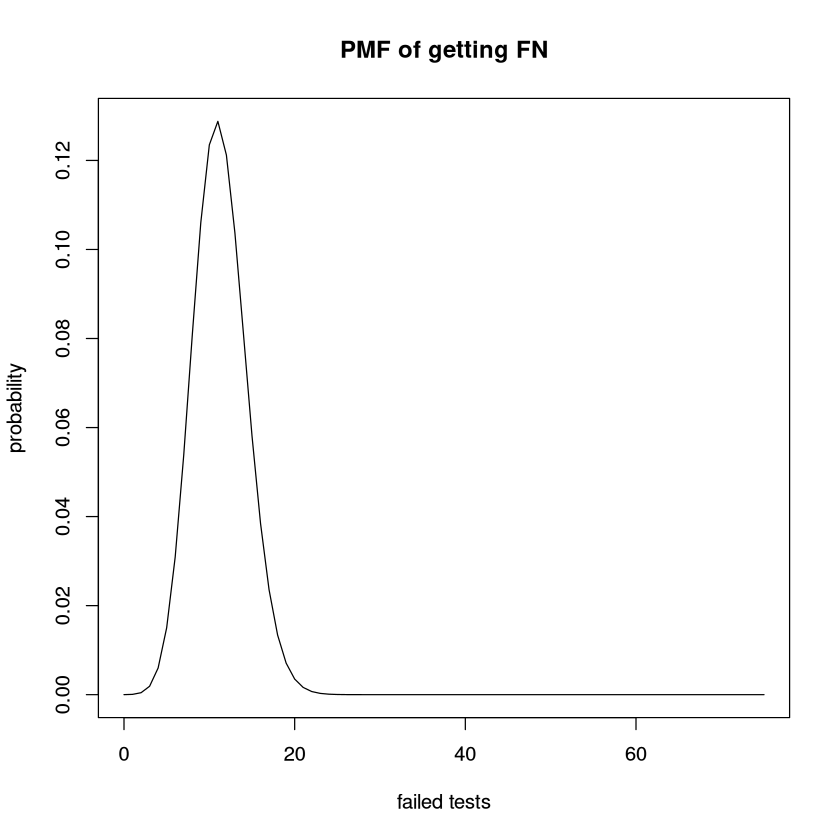

In [1]:
# frequentist approach
n <- 75
# probability of each test failing
p <- 0.15  
# the PMF of getting a false negative y is given by
steps <- 1000
range <- 0:n
PMF <- dbinom(range,n,p)
plot(range, PMF, type = 'l', xlab = 'failed tests', ylab = 'probability', main = 'PMF of getting FN')


b) let n = 75 be number of patient and given y = 6 number of failed tests, what is the frequentist estimator for the failure probability of the new method?

confidence range is: 0.0186017 - 0.1413983

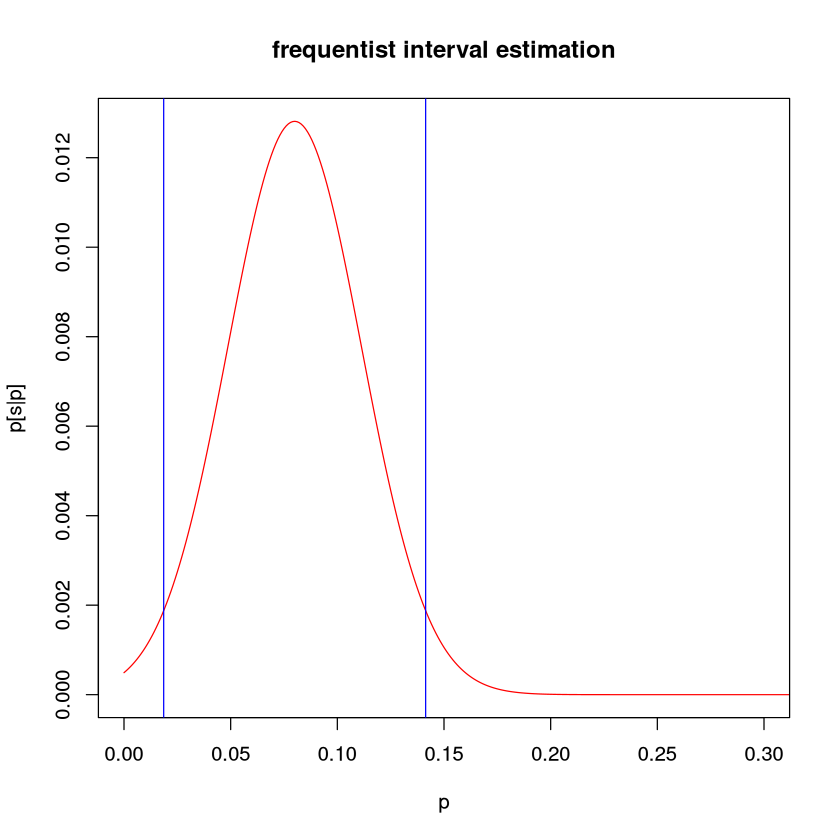

In [2]:
n <- 75
y <- 6
# unbiased estimator and its std
pf <- y / n
std <- sqrt( pf * (1 - pf) / n)
range <- seq(0,1, length.out = steps)
estimate <- dnorm(range, pf, std)
estimate <- estimate / sum(estimate)

# estimating the confidence interval
alpha <- 0.05
zalpha <- qnorm(1 - alpha / 2) # quantile function to get z-score
low <- pf - zalpha * std
high <- pf + zalpha * std
cat('confidence range is:',low,'-',high)

plot(range, estimate, type = 'l', col = 'red', main = 'frequentist interval estimation', xlab = 'p',
    ylab = 'p[s|p]', xlim=c(0,0.3))
abline(v = low, col = 'blue')
abline(v = high, col = 'blue')
legend(0.25, 12, legend = c('PDF', 'interval'), fill = c('red','blue'))

c) In Bayesian setting, evaluate the posterior probability assuming a beta distribution with mean 0.15 and std dev 0.14. Plot the posterior distribution for y and mark on the plot the mean value and variance

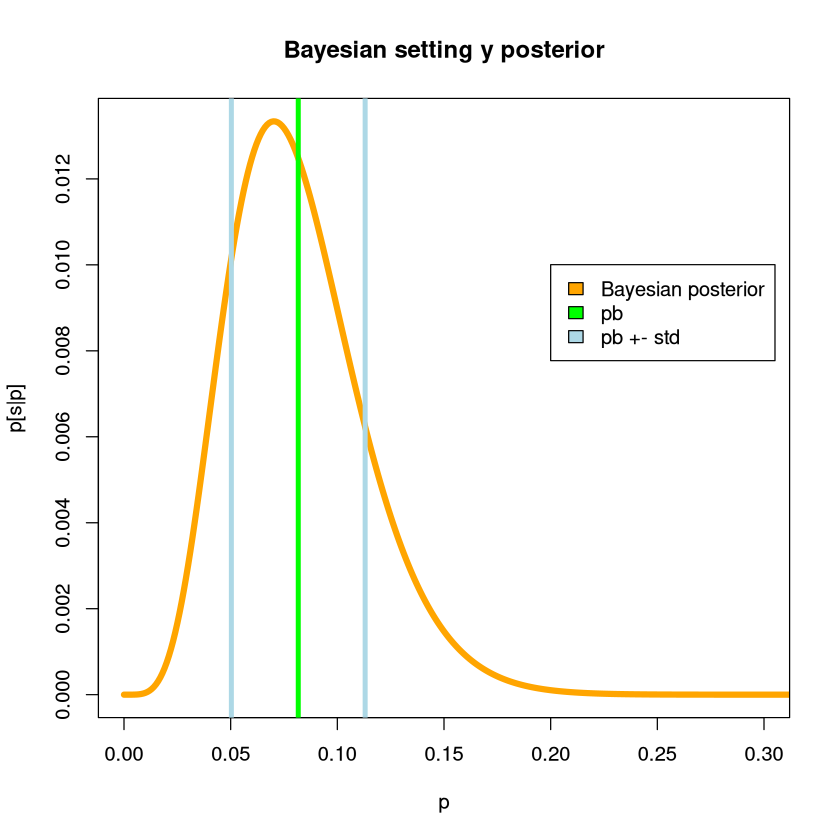

In [3]:
# prior is beta distribution B(0.15, 0.14)
# so the posterior mean is 
p <- y / n
ap <- 0.15 + y
bp <- 0.14 + n - y
pb <- ap / (ap + bp) # posterior mean
var.pb <- (ap*bp) / ((ap+bp+1)*(ap+bp)^2 )

bayes <- dbeta(range, ap, bp)
bayes <- bayes / sum(bayes)

high <- pb + sqrt(var.pb)
low <- pb - sqrt(var.pb)

plot(range, bayes, type = 'l', lwd = 5, col ='orange', main ='Bayesian setting y posterior', 
     xlab = 'p', ylab = 'p[s|p]', xlim = c(0,0.3))
abline(v = pb, col = 'green', lwd = 4)
abline(v = high, col = 'lightblue', lwd = 4)
abline(v = low, col = 'lightblue', lwd = 4)
legend(0.20, max(bayes)*3/4, legend = c('Bayesian posterior', 'pb','pb +- std'), fill = c('orange','green','lightblue')) 



d) perform a hypotesis testing assuming that if the probability of failing to detect the disease in ill patients is greater or equal than 15 % the test is no better than the traditional method. Test the sample at a 5% level of significance

since density is 0.03263082 < 0.05 the null hypotesis is rejected with CL 95 %

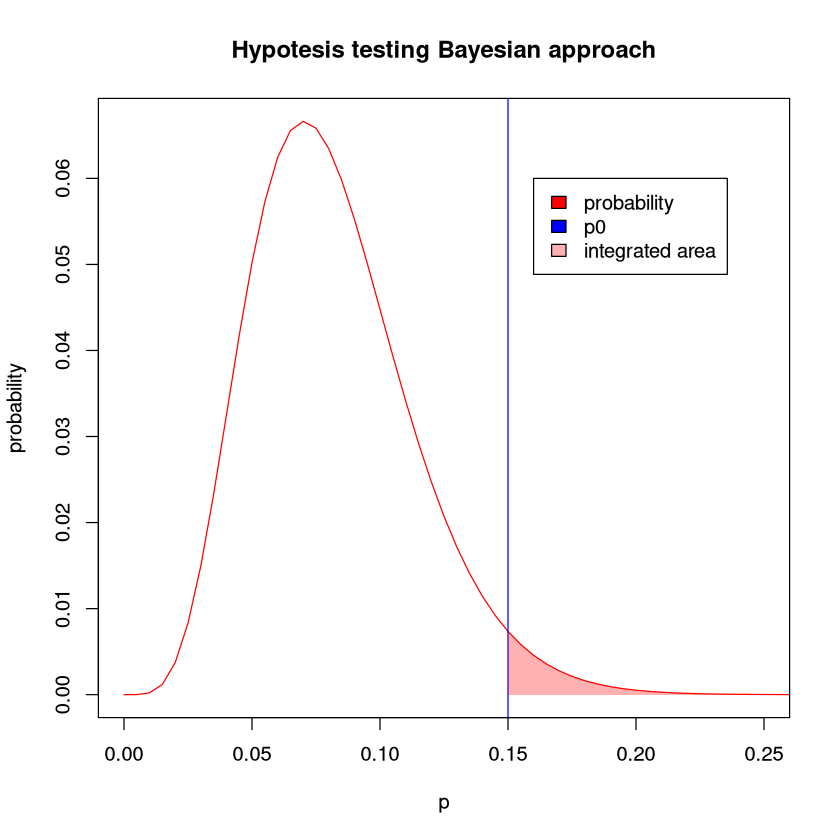

In [4]:
# prior is beta distribution B(0.15, 0.14)
# posterior is then a beta with B(0.15 + y, 0.15 - y + n)
# p for hypotesis testing is 15%
steps <- 200
n <- 75
y <- 6
null.prob <- 0.15
alpha <- 0.05
range <- seq(0,1, length.out = steps + 1)
p <- dbeta(range, 0.15 + y, 0.14 - y + n)
p <- p / sum(p)

plot(range, p, type = 'l', xlim = c(0,0.25), main = 'Hypotesis testing Bayesian approach',
    xlab = 'p', ylab = 'probability', col = 'red')
abline(v = null.prob, col = 'blue')
legend(0.16, 0.06, legend = c('probability','p0','integrated area'), fill = c('red','blue',rgb(1,0,0,0.3)))

# null hypotesis H0 is that p >= 15% (test is no better)
# alternative hypotesis H1 is that p < 15% (test is better)
# null distribution of test statistic is sampling distribution of test statistic given H0 is true
# we want to test that p >= p0 so integrate from p0 to above. If the density is > alpha the h0 is accepted
sel <- which(range >= null.prob)
density <- sum(p[sel])
cat('since density is',density,'<',alpha,'the null hypotesis is rejected with CL',(1-alpha)*100,'%')

# color the plot area
polygon(c(range[sel], range[rev(sel)]), 
        c(rep(0, length(sel)), rev(p[sel])), 
        col = rgb(1,0,0,0.3), 
        border = NA)


e) perform a hypotesis testing assuming that if the probability of failing to detect the disease in ill patients is greater or equal than 15 % the test is no better than the traditional method. Test the sample at a 5% level of significance. Do it in a classical frequentist setting

0.08 falls in the rejection region: H0 is false with 95 % CL

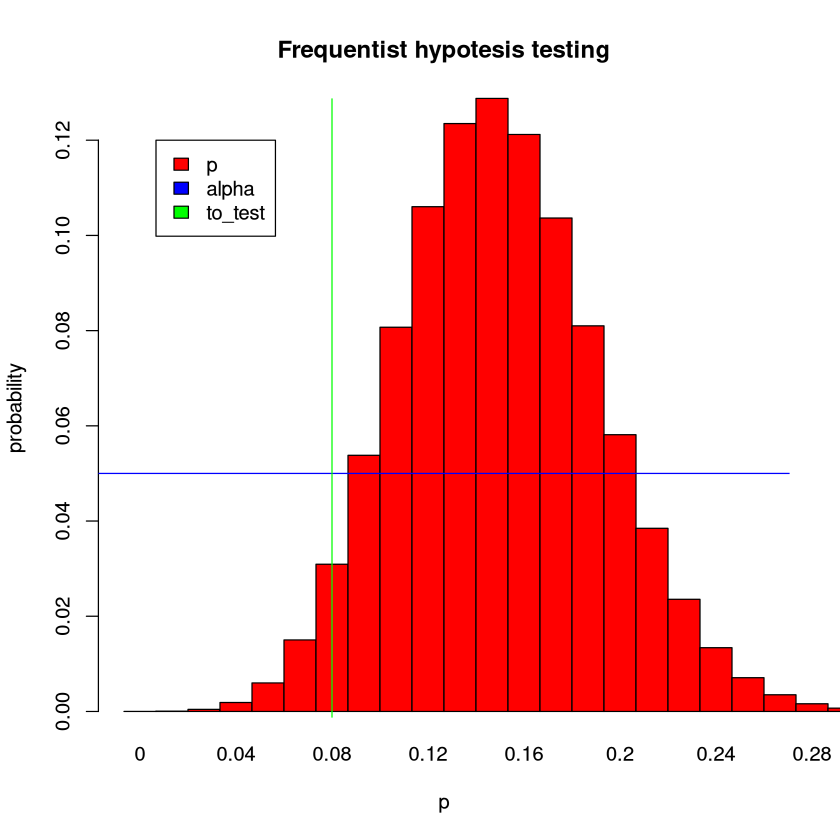

In [5]:
# null hypotesis H0 is that p >= 15% (test is no better)
# alternative hypotesis H1 is that p < 15% (test is better)
# null distribution of test statistic is sampling distribution of test statistic given H0 is true
n <- 75
y <- 6
null.prob <- 0.15
alpha <- 0.05
range <- seq(0,n, length.out = n+1)

cat(y/n,'falls in the rejection region: H0 is false with',(1 - alpha)*100,'% CL')
p <- dbinom(range, n, null.prob)
range <- range / n
barplot(p, names.arg = range,space = 0, col = 'red', xlim = c(0,20),
       main = 'Frequentist hypotesis testing', xlab = 'p', ylab = 'probability')
abline(h = alpha, col = 'blue')
legend(1, 0.12, legend = c('p','alpha','to_test'), fill = c('red','blue','green'))
abline(v = y+0.5, col ='green')



# Ex 2: 
a researcher has collected n = 20 observations that are supposed to be drawn from a unimodal Beta distribution Beta($\alpha$ = 2, $\beta$) where $\beta$ is an unknow parameter. Let the prior follow a piece-wise function.

a) find the posterior distribution, posterior mean and standard deviation

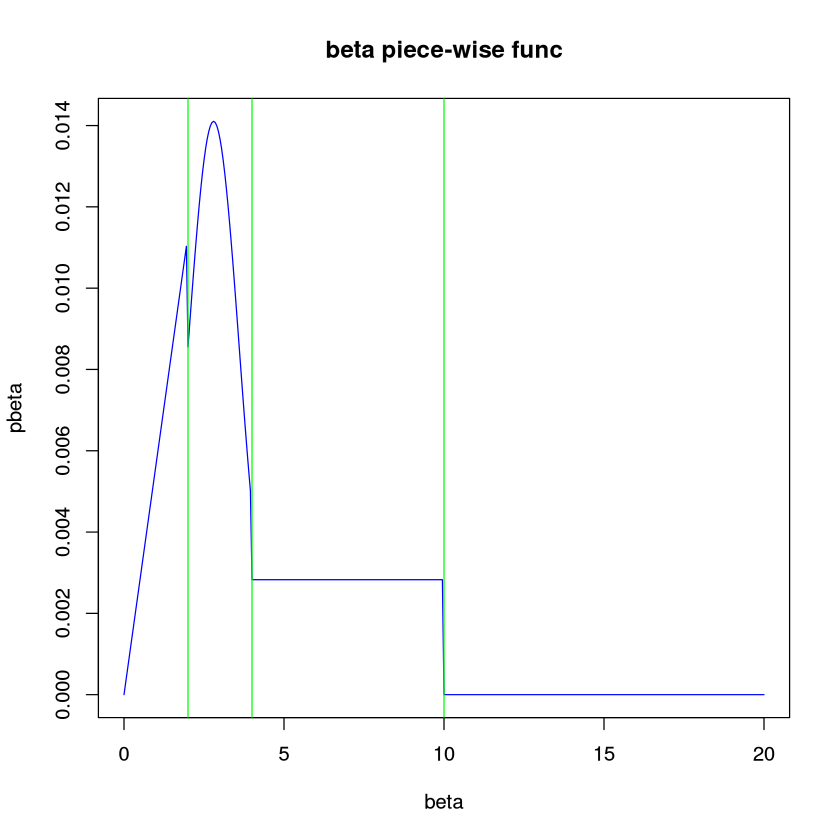

In [6]:
obs <- c(0.269, 0.344, 0.802, 0.418, 0.433, 0.835, 0.52, 0.139, 0.243, 0.294, 0.723, 0.493, 0.504, 0.428,
0.27, 0.53, 0.057, 0.585, 0.288, 0.171)
n <- length(obs)
alpha <- 2

# the prior is a beta distribution where beta follows a piece-wise function
beta <- seq(0,20, length.out = 400 + 1)
pbeta <- beta
idx1 <- which(beta < 2)
idx2 <- which(beta >= 2 & beta < 4)
idx3 <- which(beta >= 4 & beta < 10)
idx4 <- which(beta >= 10)
pbeta[idx1] <- 0.2 * beta[idx1]
pbeta[idx2] <- 1 / 0.8 / sqrt(2*pi) * exp(-(beta[idx2] - 2.8)^2 / (2*0.8^2))
pbeta[idx3] <- 0.1
pbeta[idx4] <- 0

# normalization
pbeta <- pbeta / sum(pbeta)

plot(beta, pbeta, main = 'beta piece-wise func', type = 'l', col = 'blue')
abline(v = c(2,4,10), col = 'green')
legend(15, 0.4, legend = c('pbeta','thresholds'), fill = c('blue','green'))

mean: 2.809558 sd dev: 0.1873689

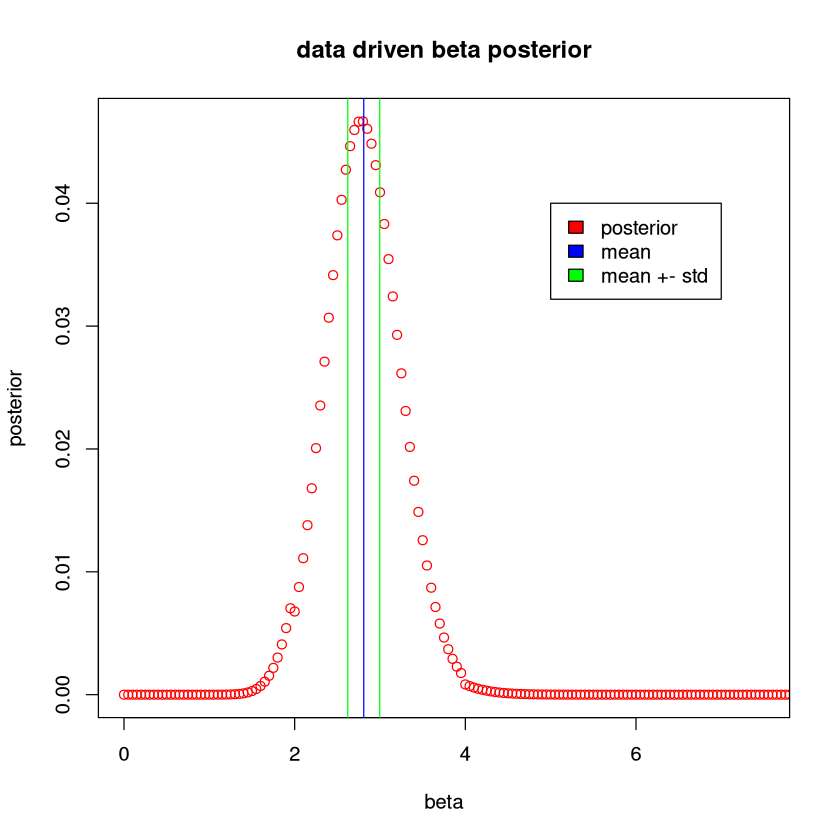

In [7]:
# objective is to estimate beta given the data observed
alpha <- 2 # alpha is fixed
n <- length(obs)
# the log-ikelihood for a beta distribution is
log.likelihood <- sapply(beta, function(b) {
    log_const <- lgamma(alpha + b) - lgamma(alpha) - lgamma(b)
    sum(log(obs)) + (b - 1) * sum(log(1 - obs)) + n * log_const
    })

log.posterior <- log(pbeta) + log.likelihood
log.posterior[is.infinite(log.posterior)] <- -Inf
posterior <- exp(log.posterior - max(log.posterior))

# normalization
posterior <- posterior / sum(posterior)
mean <- sum(posterior * beta)
std <- sum(posterior * beta^2) - mean^2

plot(beta, posterior, xlim = c(0,7.5), xlab ='beta', ylab = 'posterior', main = 'data driven beta posterior',
    col = 'red')
abline(v = mean, col = 'blue')
abline(v = mean + std, col = 'green')
abline(v = mean - std, col = 'green')
legend(5, 0.04, legend = c('posterior','mean','mean +- std'), fill = c('red','blue','green'))
cat('mean:',mean,'sd dev:',std)


b) find the 95% credibility interval for $\beta$

In [8]:
alpha <- 0.05
cdf <- cumsum(posterior)
start <- which(cdf >= alpha / 2)[1]
finish <- which(cdf >= 1 - (alpha/2))[1]
cat('95% credibility interval is:',beta[start],'-',beta[finish])

95% credibility interval is: 1.95 - 3.7

c) plot the posterior distribution including the mean, std and 95% cred interval

mean: 2.809558 sd dev: 0.1873689

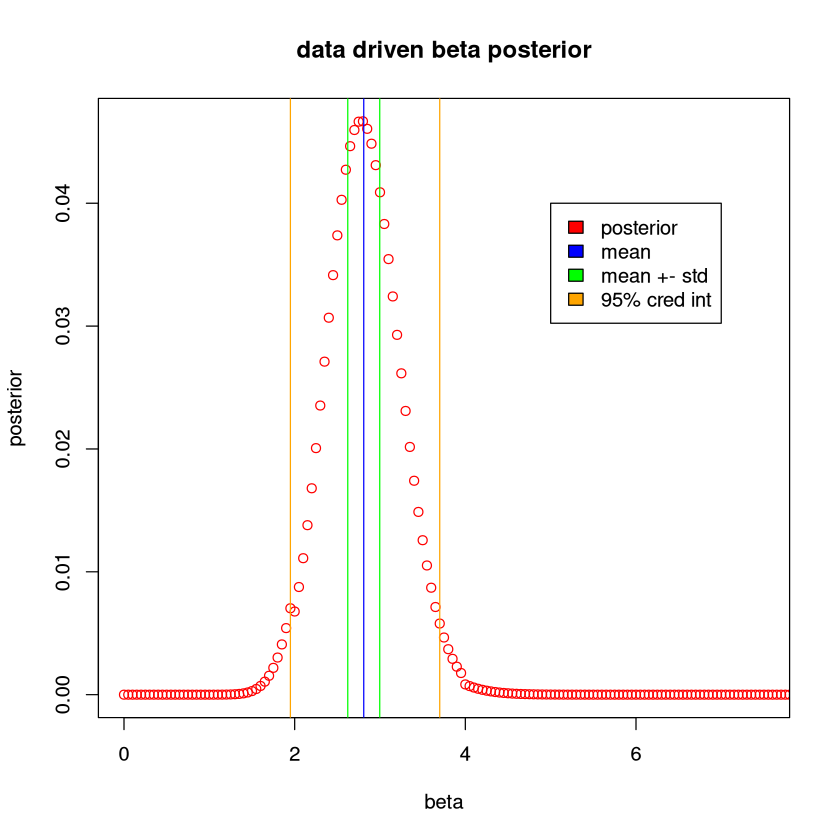

In [9]:
plot(beta, posterior, xlim = c(0,7.5), xlab ='beta', ylab = 'posterior', main = 'data driven beta posterior',
    col = 'red')
abline(v = mean, col = 'blue')
abline(v = mean + std, col = 'green')
abline(v = mean - std, col = 'green')
abline(v = beta[start], col = 'orange')
abline(v = beta[finish], col = 'orange')
legend(5, 0.04, legend = c('posterior','mean','mean +- std','95% cred int'), fill = c('red','blue','green','orange'))
cat('mean:',mean,'sd dev:',std)


d) plot the prior, the likelihood and the posterior distribution

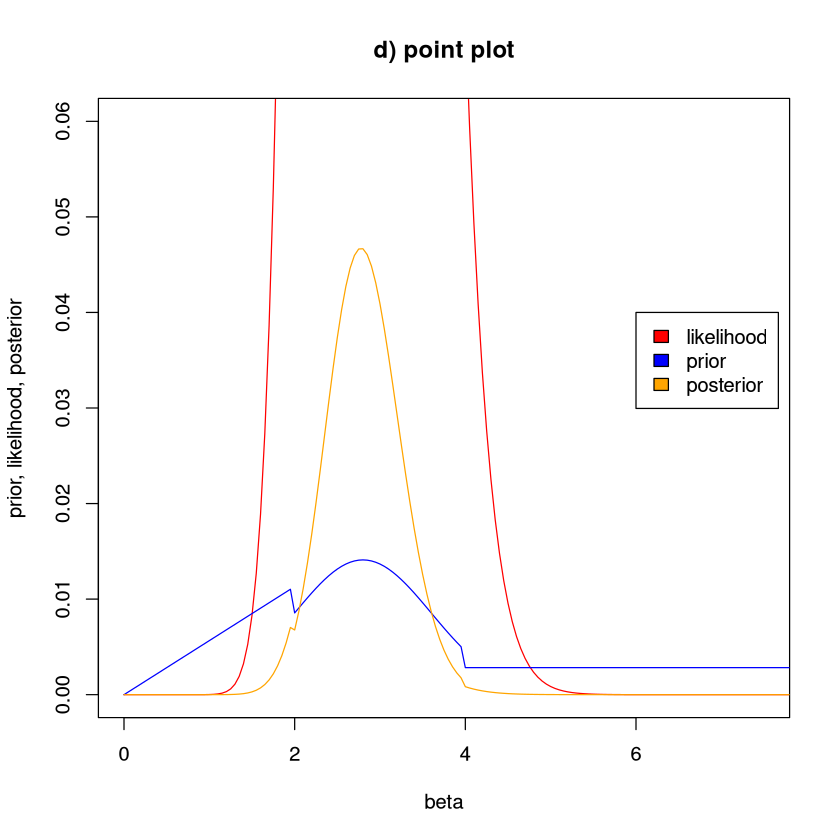

In [10]:
likelihood <- exp(log.likelihood - max(log.likelihood))
likelihood <- likelihood / sum(likelihood * diff(beta)[1])

plot(beta, likelihood, xlim = c(0,7.5), xlab ='beta', ylab = 'prior, likelihood, posterior', 
     main = 'd) point plot',
    col = 'red', type = 'l', ylim = c(0,0.06))
lines(beta, pbeta, col = 'blue')
lines(beta, posterior, col = 'orange')
legend(6, 0.04, legend = c('likelihood', 'prior','posterior'), fill = c('red','blue','orange'))


# Ex 3: six boxes toy model

In [11]:
# labelling the boxes
names <- c('H0','H1','H2','H3','H4','H5')
white <- c(0,1,2,3,4,5)
black <- c(5,4,3,2,1,0)
boxes <- data.frame(Name = names, w = white, b = black)

In [21]:
# select a random box
sel.box <- function(){
    sample(0:5,1)
    }

In [47]:
# pick a ball from a given box
sel.ball <- function(box, boxes){
    mybox <- boxes[boxes['w'] == box]
    ball.id <- sample(1:5, 1)
    return (ball.id)
    }

In [48]:
boxes

Name,w,b
<chr>,<dbl>,<dbl>
H0,0,5
H1,1,4
H2,2,3
H3,3,2
H4,4,1
H5,5,0


In [128]:
# print out the probability for a box (of extracting a white ball) given the previous observations
set.seed(110)
box.id <- sel.box() # choice of a box to run the experiment with
box <- boxes[boxes['w'] == box.id]
cat('white balls in the box:', box[2], '\n')

n.trials <- 50
extracted <- c(NA) # saves extracted balls
exp.p <- c() # saves probabilities ball by ball
boxes['p'] <- c(1,1,1,1,1,1) / 6 # fixed probability per each box of being that box
posterior <- boxes$p
#posterior
results <- data.frame(matrix(NA, nrow = n.trials + 1, ncol = 6))
colnames(results) <- paste0("Box_", 0:5)
results[1, ] <- posterior


for (i in 1:n.trials){
    ball.id <- sel.ball(box.id,boxes)
    if(ball.id <= box[2]){
        extracted <- c(extracted, 1) # is extracted white
    }
    else{
        extracted <- c(extracted, 0) # is extracted black
    }

    # compute likelihoods
    likelihoods <- mapply(function(w, b) {
        if (extracted[length(extracted)] == 1) return(w / (w + b))
        else return(b / (w + b))
    }, boxes$w, boxes$b)
    
    posterior <- posterior * likelihoods
    posterior <- posterior / sum(posterior)
    #cat(posterior,'\n')
    #range <- seq(0,i,length.out = i+1) # for computing probability and likelihood
    #exp.p.distr <- dbinom(range, length(extracted), sum(extracted)/length(extracted))
    #plot(range, exp.p.distr, type = 'l', col = 'red
    results[i+1, ] <- posterior
}
#results['extracted'] <- extracted
results

white balls in the box: 3 


Box_0,Box_1,Box_2,Box_3,Box_4,Box_5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.1666667,1.666667e-01,0.1666666667,0.16666667,0.16666667,0.1666667
0.0000000,6.666667e-02,0.1333333333,0.20000000,0.26666667,0.3333333
0.0000000,1.818182e-02,0.0727272727,0.16363636,0.29090909,0.4545455
0.0000000,4.444444e-03,0.0355555556,0.12000000,0.28444444,0.5555556
0.0000000,1.021450e-03,0.0163432074,0.08273749,0.26149132,0.6384065
0.0000000,2.259887e-04,0.0072316384,0.05491525,0.23141243,0.7062147
0.0000000,2.484472e-03,0.0596273292,0.30186335,0.63602484,0.0000000
0.0000000,6.956522e-04,0.0333913043,0.25356522,0.71234783,0.0000000
0.0000000,1.891611e-04,0.0181594628,0.20684763,0.77480375,0.0000000


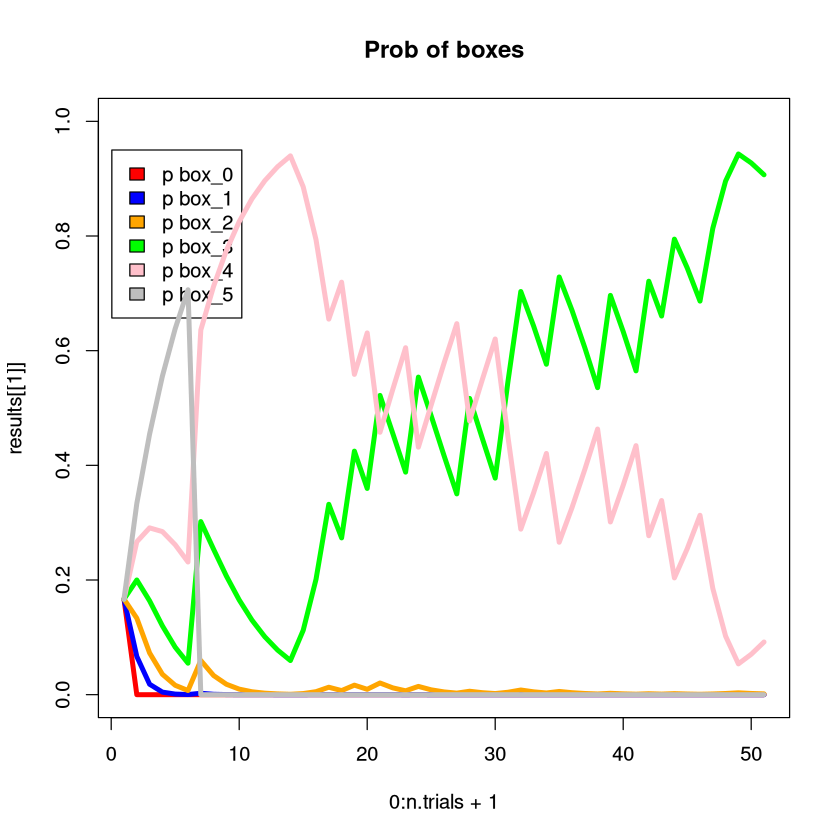

In [131]:
colors <- c('red','blue','orange','green','pink','grey')
col_id <- 1
plot(0:n.trials+1, results[[1]], main = paste0('Prob of boxes'), type = 'l', col=colors[col_id],
    ylim = c(0,1))
legend(0.05,0.95, legend = paste0("p box_", 0:5), fill = colors)

for(i in colnames(results)){
    lines(0:n.trials+1, results[[i]], xlab = 'trials', ylab = 'p',
        col = colors[col_id], lwd = 4)
    col_id <- col_id + 1
}